# Regression

With this exercise, you can learn more about classification. You can try of different variants of linear regression on a data set and compare the performance with different metrics. You should also try to gain insights into the models through the coefficients. 

## Libraries and Data

Your task in this exercise is to try out different regression models, evaluate their goodness of fit and evaluate the meaning of the coefficients. You can find everthing you need in ```sklearn```, ```statsmodel``` is another popular library for this kind of analysis. 

We use data about [house prices in california](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) in this exercise. 

We start by loading the required libraries and data. 

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
print(data.DESCR)

X = data.data
Y = data.target
predictors = data.feature_names

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Generating training and test data

Before you can start building regression models, you need to separate the data into training and test data. Please use 50% of the data for training, and 50% of the data for testing. 

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

### Train, Test, Evaluate

Now that training and test data are available, you can try out the different variants of linear regression. What happens when you use OLS/Ridge/Lasso/Elastic Net? How does the goodness of fit measured with $R^2$ on the test data change? Additionally, perform a visual evaluation of the results. How do the coefficients change?

We train and predict all models with scikit-learn. We try to values for of $\alpha$ for Ridge (1, 1000) and Lasso (1, 0.1). For the Elastic Net, we use $\alpha=0.1$ and $\rho=0.5$. We visualize the predicted versus the actual values and the coefficients of all models. The $R^2$ score and the MSE are printed in the heading of the plots.

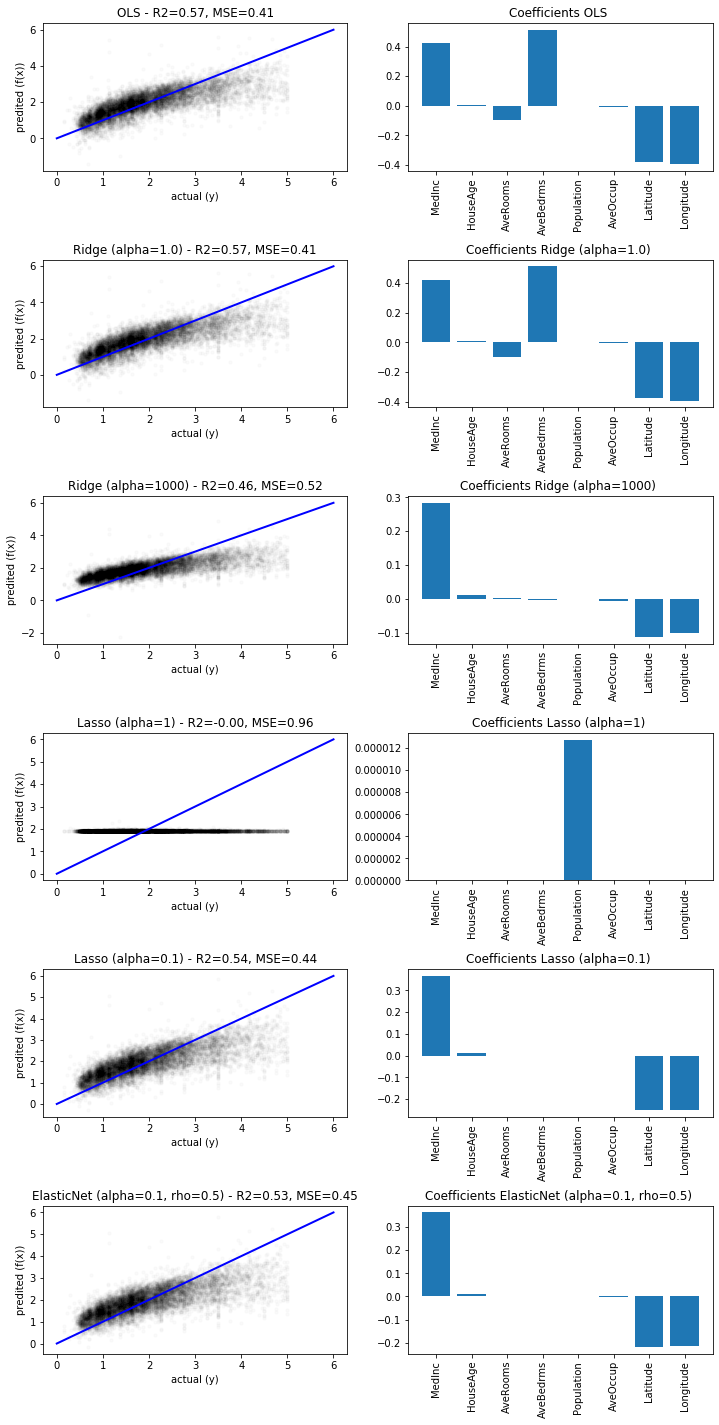

In [9]:
# Setup models
models = [linear_model.LinearRegression(), 
          linear_model.Ridge(alpha=1),
          linear_model.Ridge(alpha=1000),
          linear_model.Lasso(alpha=1), 
          linear_model.Lasso(alpha=0.05), 
          linear_model.ElasticNet(alpha=0.1), ]
names = ['OLS','Ridge (alpha=1.0)', 'Ridge (alpha=1000)', 'Lasso (alpha=1)','Lasso (alpha=0.1)', 'ElasticNet (alpha=0.1, rho=0.5)']

# Training and prediction
Y_pred = {}
for i,model in enumerate(models):
    model.fit(X_train,Y_train)
    Y_pred[names[i]] = model.predict(X_test)

# Visualize Results
fig, axes = plt.subplots(len(models),2, figsize=(12,3.5*len(models)))
y_max = 6
for i, (model, name) in enumerate(zip(models, names)):
    r2 = r2_score(Y_test, Y_pred[name])
    mse = mean_squared_error(Y_test, Y_pred[name])

    axes[i,0].set_title('%s - R2=%.2f, MSE=%.2f' % (name, r2, mse))
    axes[i,0].scatter(Y_test, Y_pred[names[i]],  color='black', s=10, alpha=0.02)
    axes[i,0].plot([0, y_max],[0,y_max] , color='blue', linewidth=2)
    axes[i,0].set_xlabel('actual (y)')
    axes[i,0].set_ylabel('predited (f(x))')

    
    axes[i,1].set_title('Coefficients %s ' % name)
    axes[i,1].bar(predictors, model.coef_)
    axes[i,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.6)
plt.show()

We observe that all predictions, except those for Lasso with $\alpha=1$ are relatively similar in terms of $R^2$, MSE, and also with respect to the visual analysis. We also see that there is a all values of $y$ above 5 seem to be binned into the value 5.00001.

In [10]:
sum(data.target==5.00001)

965

This happened, because we used the data, without a prior analysis of the distributions, as we explained in [Chapter 3](03_Data-Exploration). We repeat the experiment, but drop all instance with $y>5$. This means we also need to repeat the train-test split.

Dropping 965 instances before running regression


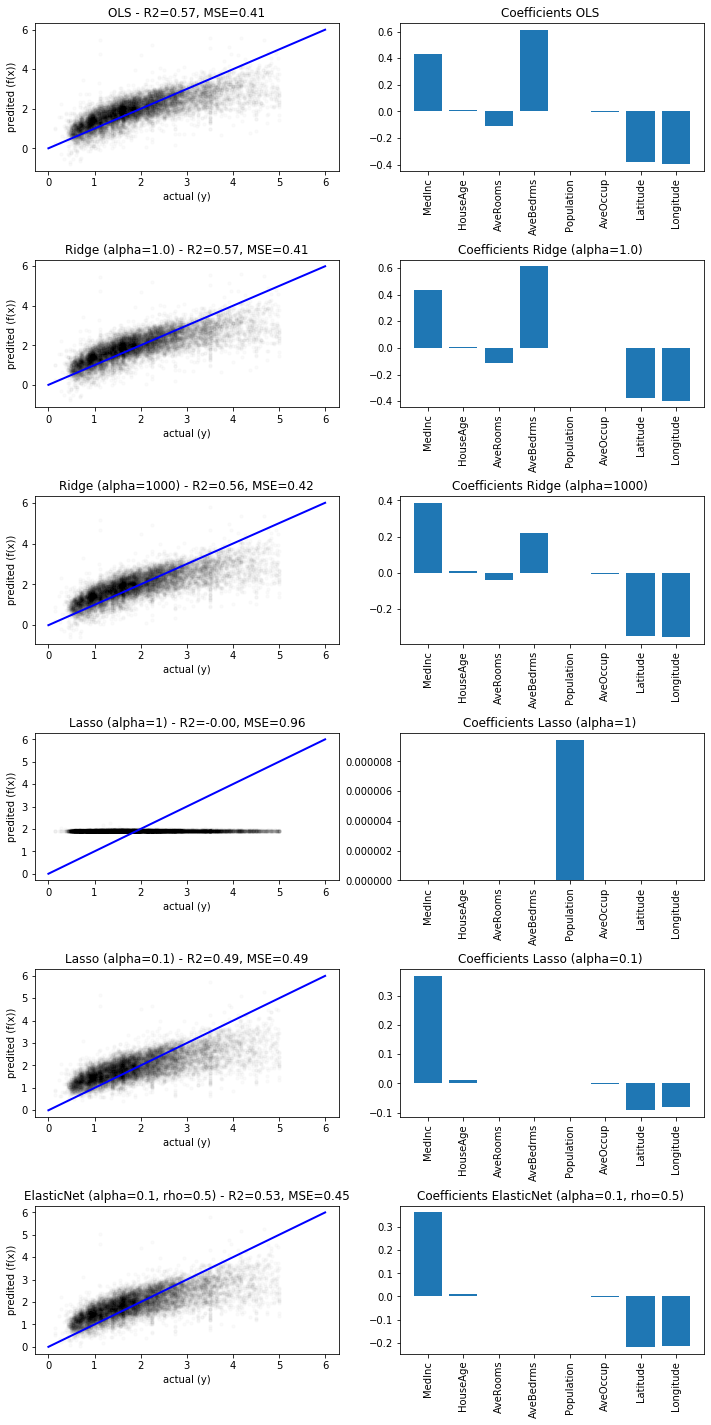

In [18]:
print('Dropping %i instances before running regression' % sum(data.target>5))
X = data.data[data.target<=5]
Y = data.target[data.target<=5]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Setup models
models = [linear_model.LinearRegression(), 
          linear_model.Ridge(alpha=1),
          linear_model.Ridge(alpha=1000),
          linear_model.Lasso(alpha=1), 
          linear_model.Lasso(alpha=0.1), 
          linear_model.ElasticNet(alpha=0.1), ]
names = ['OLS','Ridge (alpha=1.0)', 'Ridge (alpha=1000)', 'Lasso (alpha=1)','Lasso (alpha=0.1)', 'ElasticNet (alpha=0.1, rho=0.5)']

# Training and prediction
Y_pred = {}
for i,model in enumerate(models):
    model.fit(X,Y)
    Y_pred[names[i]] = model.predict(X_test)

# Visualize Results
fig, axes = plt.subplots(len(models),2, figsize=(12,3.5*len(models)))
y_max = 6
for i, (model, name) in enumerate(zip(models, names)):
    r2 = r2_score(Y_test, Y_pred[name])
    mse = mean_squared_error(Y_test, Y_pred[name])

    axes[i,0].set_title('%s - R2=%.2f, MSE=%.2f' % (name, r2, mse))
    axes[i,0].scatter(Y_test, Y_pred[names[i]],  color='black', s=10, alpha=0.02)
    axes[i,0].plot([0, y_max],[0,y_max] , color='blue', linewidth=2)
    axes[i,0].set_xlabel('actual (y)')
    axes[i,0].set_ylabel('predited (f(x))')

    
    axes[i,1].set_title('Coefficients %s ' % name)
    axes[i,1].bar(predictors, model.coef_)
    axes[i,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.6)
plt.show()

Interestingly, the results did not change much, except for Lasso with $\alpha=1.0$, which got even worse and now seems to yield an almost constant prediction. This is because the regularization strength is to high, meaning that it is better for the optimization to do nothing, than to actually fit a linear model. With $\alpha=0.1$ Lasso works as expected and drops some coefficients without a big loss in the goodness of fit. With Ridge, we observe the opposite with respect to $\alpha$. With $\alpha=1.0$, nothing happens. Only when we increase $\alpha$ to 1000, we see that the coefficients shrink: we observe that AveRooms and AveBedrms both shrink, where AveRooms is negative and AveBedRms is positive. Since it makes sense, that the number of rooms and the number of bedrooms is correlated, this makes sense. With Lasso, only the MedInc, house age, and Latitude, and Longitude survive. This indicates that in California the realter phrase "location, location, location" seems to be true. 

Finally, we observe from the visual analysis, the the house prices seem to be roughly linear, but not completely. We see a systematic under prediction of house prices for the most expensive homes. 